# Final Project
### Electric Vehicles Market Landscape

#### Principal Investigator: Shucheng He, Tiantai Bai<br>Email: [peter.he@nyu.edu](peter.he@nyu.edu), [tb1730@nyu.edu](tb1730@nyu.edu) 

  In this project we will conduct research on the U.S. Electric Vehicles (EV) market, specifically, the Plug-in Electric Vehicles (PEV) segment that has caused quite a stir in the automobile industry these last few years.
    
  The specific segment, though fairly new, has experienced high speed expansion and attention in the past decade, as a result of increasing focus on ESG issues. Driven by Financial interest, Environmental concern and Social Benefit, both consumer and major automobile manufacturers have turned to electric cars.


  The key element of the project is getting sales data of major PEV manufacturers and models to measure performance. Details of the datasets are described below in the data report.

We anticipate the project will include following sections:

- We will start by visualising a past sales trend of the EV market, to get and idea of how the market has evovled over time and look into some factor that may correlate with the trend.

- Visualizations of how the major competitors in the market have changed base on data of 2016, 2017, and 2018. While comb through our data, we realized that some brands/models have been a major contributor to the growth of the market, so, the idea is to create three bubble charts showing the major players in the market each year and their performances.

## Data Report  

#### Overview:   
The data behind this project comes from  [U.S. Department of Energy](https://afdc.energy.gov/data/data/data/data/data/data/data/data/data/data/data/data/data/data/?utf8=%E2%9C%93&per_page=150). They provide vehicles sales data dated and oil price and demand data.
We will also be using leading firm’s (Ford, Nissan, Toyota, Tesla, ) annual report to conduct detailed microscopic analysis.  
  
To keep in mind that, analysis of Electric Vehicles suffer from scarceness of data, as the battery technology that allow electric vehicles to be distributed is fairly recent. As a result our data for hybrid vehicles dated back to 1999 and battery vehicles data back to 2010.   

**Important Variables:** The key series that will be included are:  

United States Gasoline Price/Oil Demand: through seasonally adjusted data we want get an outlook for the future of the market. In charts of HEV & EV sales presented by [Alternative Fuel Data Center](https://afdc.energy.gov/data/10301), we can see a dip in sales between 2014 and 2016, when gasoline price was experiencing a drop.   
We want to graph the series with sales and see if the correlation is visible through time. If we see and correlation we might be able to assume an shallow outlook for the EV market.  

Sales by Model: Number of models in the PEV market have increased immensely during the past decade, but we are still see some models taking up significant percentage of market share, or, driving the growth of the sector. We aim to examine the market component through analyzing sales by model.  

MSRP (Manufacturer's Suggested Retail Price) by Model: this will show the targeted consumer segment the manufacturer wanted its model to be targeted to. This will help us get an idea of the performance of models in different price segments.

**Access:**   
We are importing data from Bloomberg, [Alternative Fuel Data Center](https://afdc.energy.gov/data/10301) and Company annual report. All data are in form of excel files.  

#### Requisite Packages: 
Below I bring in the packages we will need...


In [806]:
#Packages needed
import pandas as pd 
import requests # API
import numpy as np # numerical analysis
import matplotlib.pyplot as plt # Plotting
import datetime as dt
import urllib.request
import calendar
from time import strptime
import re
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

## Part 0. Prepare Data
In this part, we will: 
- get our data from github; 
- create Function to change headers to datetime formate;
- merge all monthly sales figure to *df_sales*
- get monthly gasoline price to *p_gas*


- df-[year] : sales figure of [year]
- df_sale : 2010-2018 monthly ev sales
- p_gas : monthly gasoline price


#### Importing data

In [728]:
# File Path

gas_avg_price_dir = "https://raw.githubusercontent.com/ttbai/databootcamp/master/data/MonthlyNationalAvergaeGasolinePrice.csv"
mkt_dir = 'https://raw.githubusercontent.com/ttbai/databootcamp/master/data/16_18%20Price_MPGe%20-%20Sheet1.csv'

#EV Monthly Sales figure 2010-2018
dir2010 = "https://raw.githubusercontent.com/ttbai/databootcamp/master/data/monthly_sale/PEV-2010.csv"
dir2011 = "https://raw.githubusercontent.com/ttbai/databootcamp/master/data/monthly_sale/PEV-2011.csv"
dir2012 = "https://raw.githubusercontent.com/ttbai/databootcamp/master/data/monthly_sale/PEV-2012.csv"
dir2013 = "https://raw.githubusercontent.com/ttbai/databootcamp/master/data/monthly_sale/PEV-2013.csv"
dir2014 = "https://raw.githubusercontent.com/ttbai/databootcamp/master/data/monthly_sale/PEV-2014.csv"
dir2015 = "https://raw.githubusercontent.com/ttbai/databootcamp/master/data/monthly_sale/PEV-2015.csv"
dir2016 = "https://raw.githubusercontent.com/ttbai/databootcamp/master/data/monthly_sale/PEV-2016.csv"
dir2018 = 'https://raw.githubusercontent.com/ttbai/databootcamp/master/data/monthly_sale/PEV-2018.csv'
dir2017 = 'https://raw.githubusercontent.com/ttbai/databootcamp/master/data/monthly_sale/PEV-2017.csv'


Functions:

In [807]:
#For Changing sales figure column to date time formate
def dt_col(df):
    if 'TOTAL' in df:  
        df.drop('TOTAL', axis=1, inplace=True)
    df.replace(r'^\s*$', np.nan, regex=True,inplace =True)
    names = df.columns.tolist()
    names = names[1:]
    col = []
    year = re.sub("[^\d]", "", list(df.columns.values)[0])
    for i in names:
        iyear = str(calendar.monthrange(int(year), strptime(i,'%b').tm_mon)[1]) + '-'+str(strptime(i,'%b').tm_mon)+'-'+ year
        idt = pd.to_datetime(iyear).date()
        col.append(idt)
    recol = dict(zip(names, col))
    
    col1 = str(df.columns[0])
    df[col1] = df[col1].str.replace('*', '')
    return df.rename(columns = recol)


#### Monthly Sales from [InsideEVs](https://insideevs.com/).  
#### Then use the function above to change index to datetime.

In [730]:
df_2010 = pd.read_csv(dir2010)
df_2011 = pd.read_csv(dir2011)
df_2012 = pd.read_csv(dir2012)
df_2013 = pd.read_csv(dir2013)
df_2014 = pd.read_csv(dir2014)
df_2015 = pd.read_csv(dir2015)
df_2016 = pd.read_csv(dir2016)
df_2017 = pd.read_csv(dir2017)
df_2018 = pd.read_csv(dir2018)

df_2010 = dt_col(df_2010)
df_2011 = dt_col(df_2011)
df_2012 = dt_col(df_2012)
df_2013 = dt_col(df_2013)
df_2014 = dt_col(df_2014)
df_2015 = dt_col(df_2015)
df_2016 = dt_col(df_2016)
df_2017 = dt_col(df_2017)
df_2018 = dt_col(df_2018)

df_2010 = df_2010.rename(columns={df_2010.columns[0]:'U.S. EV SALES' })
df_2011 = df_2011.rename(columns={df_2011.columns[0]:'U.S. EV SALES' })
df_2012 = df_2012.rename(columns={df_2012.columns[0]:'U.S. EV SALES' })
df_2013 = df_2013.rename(columns={df_2013.columns[0]:'U.S. EV SALES' })
df_2014 = df_2014.rename(columns={df_2014.columns[0]:'U.S. EV SALES' })
df_2015 = df_2015.rename(columns={df_2015.columns[0]:'U.S. EV SALES' })
df_2016 = df_2016.rename(columns={df_2016.columns[0]:'U.S. EV SALES' })
df_2017 = df_2017.rename(columns={df_2017.columns[0]:'U.S. EV SALES' })
df_2018 = df_2018.rename(columns={df_2018.columns[0]:'U.S. EV SALES' })


Merge all Dataframe

In [731]:
df_list = [df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018]
df_sale = pd.DataFrame()
df_sale['U.S. EV SALES'] = ''
for i in df_list:
    df_sale = df_sale.merge(i, on='U.S. EV SALES',how = 'outer')
df_sale = df_sale.sort_values('U.S. EV SALES', ascending=True).reset_index()
df_sale.drop('index',axis=1, inplace=True)
#remove blanks
#df_sale.replace(r'^\s*$', np.nan, regex=True,inplace =True)


#### Gasoline Price

In [808]:
# Gasoline Price
p_gas = pd.read_csv(gas_avg_price_dir)
# Drop empty and unnecessary rows
p_gas.drop(p_gas.columns[0],axis=1,inplace=True)
p_gas.drop(p_gas.columns[-1],axis=1,inplace=True)
p_gas.drop(p_gas.columns[-1],axis=1,inplace=True)
p_gas.dropna(inplace = True)
p_gas = p_gas.set_index(p_gas.columns[0]) 
p_gas.index = pd.to_datetime(p_gas.index)


### Part 1. Monthly Gasoline Price vs. EV Sales Figure
This part, we will take our cleaned Data from 
Prepare data for first graph

In [704]:
#ev monthly sales 2010-2018
df1 = df_sale.transpose()
df1.columns = df1.iloc[0]
df1 = df1[1:]
#all to int
cols = df1.columns.tolist()
df1 = df1.fillna(-1)
for i in cols:
    df1[i] = df1[i].astype(int)
    df1[i] = df1[i].replace(-1, np.nan)
df1['Total'] = df1.sum(axis = 1, skipna = True) 

In [705]:
# Get Oil price for years with available pev sales figure
match = df1.index.tolist()
df2 = p_gas[p_gas.index.isin(match)]

In [706]:
# Join gas price and pev sales data

df_g = df1.join(df2)


Graph

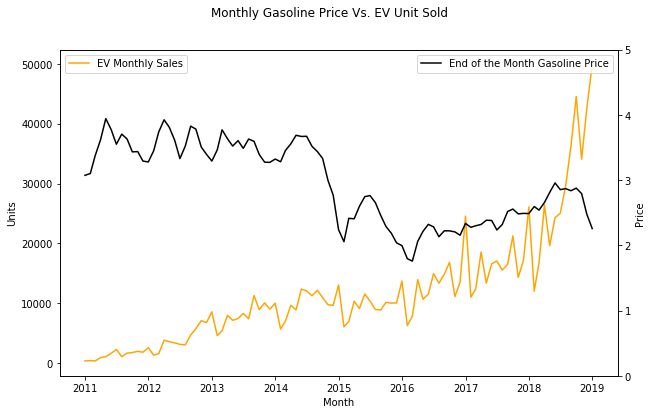

<Figure size 432x288 with 0 Axes>

In [773]:
fig, ax1 = plt.subplots(figsize = (10,6))

fig.suptitle("Monthly Gasoline Price Vs. EV Unit Sold")
ax1.set_xlabel('Month')
ax1.set_ylabel('Units')
#ax1.set_ylim([0,300000])
ax1.plot(df_g.index, df_g.Total,c = 'orange',label = 'EV Monthly Sales')
ax1.tick_params(axis='y')
plt.legend()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Price')  # we already handled the x-label with ax1
ax2.plot(df_g.index, df_g['Last Price'], c="black", label = 'End of the Month Gasoline Price')
ax2.set_ylim([0,5])
ax2.tick_params(axis='y')

plt.legend()

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
plt.savefig('GasVSsale.png')

**Analysis:**
 - One possible reason we think is driving consumer's motivation to buy electric vehicles is that it could help them to save significantly on gasoline costs. Moreover, an overall increasing trend in gasoline price changes might motivate more consumers to buy electric vehicles
 
 - From the first chart, we can see that there are three periods that are worth noting. From 2011 to 2014, 2014 to 2016, and 2016 to the end of 2018. Therefore we went and plotted three graphs comparing each time period's month-over-month changes in gas price and EV sales.

## Part 1.5 Month-over-Month Changes in Gasoline Price vs EV Sales


In [820]:
#Calculating the % change of EV Monthly Sales
df_g['EV Pct Change'] = df_g.Total.pct_change()*100

#Changing the % change in Gas price to an int number
df_g['% Change'] = df_g['% Change'].str.replace("%","").astype(float)


### Plot for 2011 to 2014

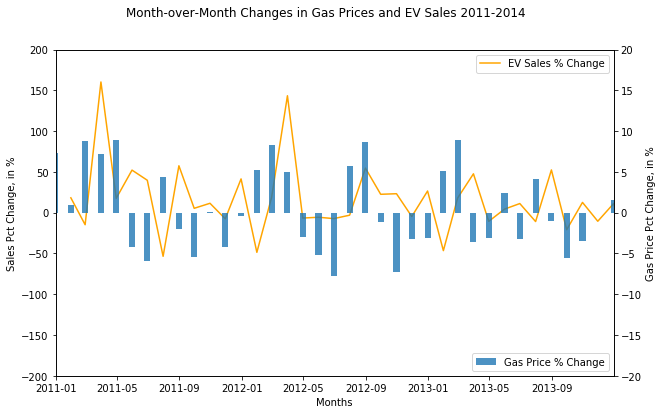

In [825]:
fig, ax1 = plt.subplots(figsize = (10,6))

fig.suptitle("Month-over-Month Changes in Gas Prices and EV Sales 2011-2014")
ax1.set_xlabel('Months')
ax1.set_ylabel('Sales Pct Change, in %')
ax1.set_ylim([-200,200])
ax1.plot(df_g.index, df_g['EV Pct Change'],c = 'orange',label = 'EV Sales % Change')
ax1.tick_params(axis='y')

plt.legend(loc = 'upper right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.bar(df_g.index, df_g['% Change'], width = 12, alpha = 0.8, label = 'Gas Price % Change')
ax2.set_ylim([-20,20])
ax2.set_ylabel('Gas Price Pct Change, in %')
ax2.tick_params(axis='y')

plt.legend(loc = 'lower right')

ax1.set_xlim(dt.datetime(2011,1,1), dt.datetime(2013,12,31))

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('PctChg11-14.png')
plt.show()


### Plot for 2014 to 2016

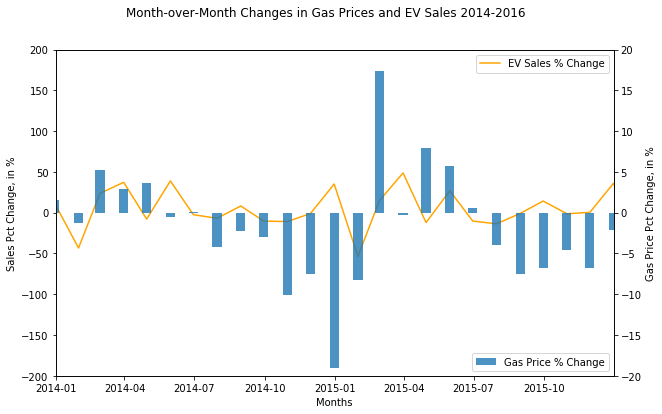

In [827]:
fig, ax1 = plt.subplots(figsize = (10,6))

fig.suptitle("Month-over-Month Changes in Gas Prices and EV Sales 2014-2016")
ax1.set_xlabel('Months')
ax1.set_ylabel('Pct Change, in %')
ax1.set_ylim([-200,200])
ax1.plot(df_g.index, df_g['EV Pct Change'],c = 'orange',label = 'EV Sales % Change')
ax1.tick_params(axis='y')

plt.legend(loc = 'upper right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.bar(df_g.index, df_g['% Change'], width = 12, alpha = 0.8, label = 'Gas Price % Change')
ax2.set_ylim([-20,20])
ax2.tick_params(axis='y')
ax2.set_ylabel('Gas Price Pct Change, in %')
ax1.set_ylabel('Sales Pct Change, in %')
plt.legend(loc = 'lower right')

ax1.set_xlim(dt.datetime(2014,1,1), dt.datetime(2015,12,31))

#fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig('PctChg14-16.png')
plt.show()

### Plot for 2016 to 2019

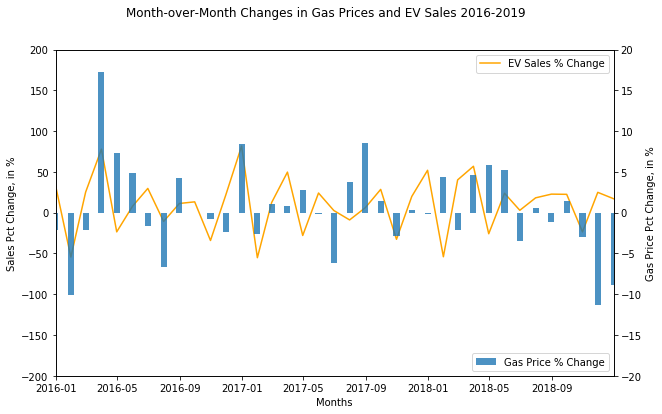

In [828]:
#Drawing the chart for 2016 to 2019
fig, ax1 = plt.subplots(figsize = (10,6))

fig.suptitle("Month-over-Month Changes in Gas Prices and EV Sales 2016-2019")
ax1.set_xlabel('Months')
ax1.set_ylabel('Pct Change, in %')
ax1.set_ylim([-200,200])
ax1.plot(df_g.index, df_g['EV Pct Change'],c = 'orange',label = 'EV Sales % Change')
ax1.tick_params(axis='y')

plt.legend(loc = 'upper right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.bar(df_g.index, df_g['% Change'], width = 12, alpha = 0.8, label = 'Gas Price % Change')
ax2.set_ylim([-20,20])
ax2.tick_params(axis='y')
ax2.set_ylabel('Gas Price Pct Change, in %')
ax1.set_ylabel('Sales Pct Change, in %')
plt.legend(loc = 'lower right')

ax1.set_xlim(dt.datetime(2016,1,1), dt.datetime(2018,12,31))

#fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig('PctChg16-18.png')
plt.show()

  From the three charts above, we can definetly observe a correlation between gas price flunctuation and EV sales.
However we cannot conclude that gas price is a major driving force for consumer's behavior.

**2011 to 2014:**
While the economy recovered, the sales in EV steadily increased. Demand for EV was vibrating with Gas price's up and down but sales remain positive most of the time.

**2014 to 2016:**
Gas prices dropped starting late 2014 to eartly 2015, yet we observe little increase in sales in these period.

**2016 to 2019:**
As gas price found middle group after year of decrease, but EV sales plummit. Later in this project, we will present bubble charts that take vehicle efficiency under consideration. Technology definely plays an important role in the EV market. While Gas Price serve as a short term factor.


## Part 2. Market Structure
In this part we will create bubble chart for year 2016-2018.  
With the bubble size representing the sales volume, y-axis as vehicle efficiency and x-axis as MSRP.  

### Getting MSRP and MPGe

 - MSRP: Manufacturer's suggested retail price
 
 From Investopedia, MSRP is the price of a product's producer recommends it be sold for. It is also referred to as the list price by many retailers. We want to use this price data in order to determine the price range of a specific model, to see which market segment the model falls into. [https://www.investopedia.com/terms/m/manufacturers-suggested-retail-price-msrp.asp]

    We suspect that the prices of a specific vehicle might have an impact on consumer's choices of purchasing that model.
    
 
 - MPGe: Miles per Gallon Equivalent
 
 Electric cars don't use gasoline as their fuel, but there is a specific rating -- MPGe -- that helps to indiciate efficiency or fuel economy for a specific electric vehicle. A higher efficiency rating will mean lower electricity costs per mile. A car with higher MPGe ratings would mean its driver would pay less per mile. We suspect this rating might also have some sort of impact on consumer's choices of purchasing electric vehicles.
 
 

**Since there is no available excel files or data files of each model's MSRP or MPGe over the last three years, I had to find the data from car dealer websites such as Kelley Blue Book or Edmonds**

In [733]:
#Read in MSRP and MPGe
mkt = pd.read_csv(mkt_dir)
#mkt.set_index(mkt.Model,inplace = True)
#mkt = mkt.drop(mkt.columns[0],axis = 1)
mkt.Model = mkt.Model.astype(str)

##### 2018 Data  
Clean and Match with Price and MPGe file  
p17

In [770]:
mk18 =df_2018
mk18 = mk18.set_index(mk18.columns[0])
col2 = mk18.columns.tolist()
mk18 = mk18.fillna(-1)
for i in col2:
    mk18[i] = mk18[i].astype(int)
    mk18[i] = mk18[i].replace(-1, np.nan)
mk18['Total'] = mk18.sum(axis = 1, skipna = True) 
mk18 = mk18.reset_index()
mk18 = mk18.rename(columns={mk18.columns[0]:'Model' })
mk18 = mk18.drop(mk18.columns[1:-1],axis = 1)
mk18.Model.loc[7] = 'Nissan LEAF'
p18 = mkt[mkt.Year == 2018]
p18 = p18.merge(mk18, on='Model',how = 'left')
p18 = p18.set_index('Model')

##### 2017 Data
Clean and Match with Price and MPGe file  
p17

In [771]:
mk17 =df_2017
mk17 = mk17.set_index(mk17.columns[0])
col3 = mk17.columns.tolist()
mk17 = mk17.fillna(-1)
for i in col3:
    mk17[i] = mk17[i].astype(int)
    mk17[i] = mk17[i].replace(-1, np.nan)
mk17['Total'] = mk17.sum(axis = 1, skipna = True) 
mk17 = mk17.reset_index()
mk17 = mk17.rename(columns={mk17.columns[0]:'Model' })
mk17 = mk17.drop(mk17.columns[1:-1],axis = 1)
mk17.Model.loc[5] = 'Nissan LEAF'
mk17.Model.loc[1] = 'Chevrolet Bolt EV'
p17 = mkt[mkt.Year == 2017]
p17 = p17.merge(mk17, on='Model',how = 'left')
p17 = p17.set_index('Model')

In [793]:
mk16 =df_2016
mk16 = mk16.set_index(mk16.columns[0])
col4 = mk16.columns.tolist()
mk16 = mk16.fillna(-1)
for i in col4:
    mk16[i] = mk16[i].astype(int)
    mk16[i] = mk16[i].replace(-1, np.nan)
mk16['Total'] = mk16.sum(axis = 1, skipna = True) 
mk16 = mk16.reset_index()
mk16 = mk16.rename(columns={mk16.columns[0]:'Model' })
mk16 = mk16.drop(mk16.columns[1:-1],axis = 1)
p16 = mkt[mkt.Year == 2016]
p16 = p16.merge(mk16, on='Model',how = 'left')
p16 = p16.set_index('Model')

### Graph 2018 Market Sturcture

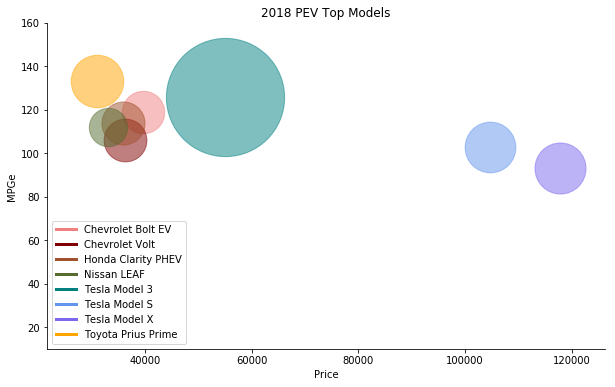

In [815]:
model_18 = p18.index.tolist()
color_list = ['lightcoral', 'maroon', 'sienna', 'darkolivegreen', 'teal', 'cornflowerblue', 'mediumslateblue', 'orange']
 
fig, ax = plt.subplots(figsize = (10,6))
counter = 0
for model in model_18:
    ax.scatter(p18['Average MSRP'].loc[model], 
           p18['MPGe Combined'].loc[model], 
           s = 0.1*p18.Total.loc[model], 
           c = color_list[counter], label = model, alpha = 0.5)
    counter = counter + 1
 
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
 
ax.set_title("2018 PEV Top Models")
ax.set_ylabel("MPGe")
ax.set_ylim([10,160])
ax.set_xlabel("Price")
 
#legend
lines = [Line2D([2], [2], color=c, linewidth=3) for c in color_list]
plt.legend(lines, model_18)
plt.savefig('2018mkt.png')
plt.show()



### Graph 2017 Market Structure 

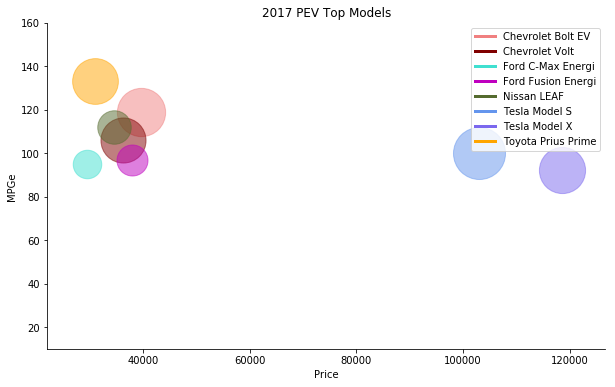

In [814]:
model_17 = p17.index.tolist()
color_list = ['lightcoral', 'maroon', 'turquoise', 'm', 'darkolivegreen', 'cornflowerblue', 'mediumslateblue', 'orange']
 
fig, ax = plt.subplots(figsize = (10,6))
counter = 0
for model in model_17:
    ax.scatter(p17['Average MSRP'].loc[model], 
           p17['MPGe Combined'].loc[model], 
           s = 0.1*p17.Total.loc[model], 
           c = color_list[counter], label = model, alpha = 0.5)
    counter = counter + 1
 
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
 
ax.set_title("2017 PEV Top Models")
ax.set_ylabel("MPGe")
ax.set_ylim([10,160])
ax.set_xlabel("Price")
 
#legend
lines = [Line2D([2], [2], color=c, linewidth=3) for c in color_list]
plt.legend(lines, model_17)
plt.savefig('2017mkt.png')
plt.show()

### Graph 2016 Market Structure

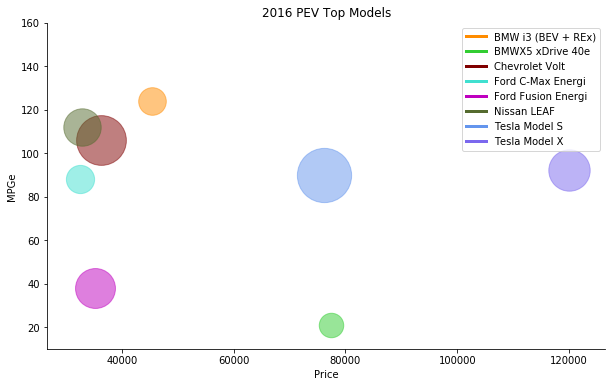

In [816]:
model_16 = p16.index.tolist()
color_list = ['darkorange', 'limegreen', 'maroon', 'turquoise', 'm', 'darkolivegreen','cornflowerblue', 'mediumslateblue']
 
fig, ax = plt.subplots(figsize = (10,6))
counter = 0
for model in model_16:
    ax.scatter(p16['Average MSRP'].loc[model], 
           p16['MPGe Combined'].loc[model], 
           s = 0.1*p16.Total.loc[model], 
           c = color_list[counter], label = model, alpha = 0.5)
    counter = counter + 1
 
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
 
ax.set_title("2016 PEV Top Models")
ax.set_ylabel("MPGe")
ax.set_ylim([10,160])
ax.set_xlabel("Price")
 
#legend
lines = [Line2D([2], [2], color=c, linewidth=3) for c in color_list]
plt.legend(lines, model_16)
plt.savefig('2016mkt.png')
plt.show()

Bubble Chart Analysis
There are a few interesting trends to draw from looking at the changes in the EV market over the last three years.
-          In terms of MPGe, there is an overall increasing trend in MPGe for the top competitors in the market, which could indicate that consumers are favoring cars that are more efficient.
-          In terms of Sales, Tesla Model S and Chevy Volt both have a consistent sales pattern in the last three years.
-          Nissan LEAF took a slight hit in 2017 but bounced back in 2018.
-          Tesla Model X and Toyota Prius Prime have all steadily increased their sales despite targeting consumers in different price point, making the two models one of the Top 4 EV models by 2018.
-          The two Ford models – Ford C-Max Energi and Ford Fusion Energi seemed to have cannibalized each other’s sales. The two model’s sales have all slightly decreased from 2016 to 2017, with Ford C-Max Energi completely dropping out of the top 8 by 2018 and Ford Fusion Energi finally able to improve its sales from 2017 to 2018.
-          Tesla Model 3 came out and completely dominated the market.